In [1]:
import sys
import os
sys.path.append(os.getcwd()+"/../")
os.chdir(os.getcwd()+"/../")

In [7]:
!python3 --version
# !pip install numpy==1.19.2
!pip uninstall numpy -y
!pip install numpy

Python 3.8.6
Found existing installation: numpy 1.19.2
Uninstalling numpy-1.19.2:
  Successfully uninstalled numpy-1.19.2
  Using cached numpy-1.21.0-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.1 requires numpy~=1.19.2, but you have numpy 1.21.0 which is incompatible.
modin 0.8.3 requires pandas==1.1.5, but you have pandas 1.2.5 which is incompatible.
You should consider upgrading via the '/home/kevintakano/miniconda3/envs/master/bin/python -m pip install --upgrade pip' command.


In [53]:
!pip install pycocotools==2.0.0

You should consider upgrading via the '/home/kevintakano/miniconda3/envs/master/bin/python -m pip install --upgrade pip' command.


# LOAD TRAIN

In [2]:
import sys
import os
os.getcwd()

'/home/kevintakano/master'

In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
import sklearn
sklearn.__version__

'0.24.2'

In [5]:
from lib.utils.process_input import get_gen_outs

In [6]:

from lib.config.control import *

In [7]:
# X_train, y_train, _, _ = SINGLESTGAN.load_input("train")
# X_valid, y_valid, _, _ = SINGLESTGAN.load_input("valid")
# X_train

In [8]:
import numpy as np
np.__version__

'1.19.2'

# Input

In [9]:
# import lib.data.preprocess as preprocess
# train_df, valid_df, test_df = preprocess.load_prepared()
# train_df.head()

In [10]:
# o_train, train_buyers, train_nonbuyers = t.load_with_filters("train")
# X = o_train[0]

In [34]:
from lib.utils.process_input import fit_one_hots, get_gen_outs,apply_encoder_in_batch
import numpy as np
def apply_pad_2(mat, N):
    res = [0 for i in range(0,mat.shape[0])]
    i = 0
    for sample in mat:
        res[i] = pad_array_with_constant_arr(sample,i,N)
#         res[i] = np.expand_dims(res[i],axis=2)
        i+=1

    return np.array(res)

gen_outs = get_gen_outs()
PAD_ARRAY = []
no_first = False

MASK_VALUE = -2
for out in gen_outs:
    if out != 1 :
        array_out = np.full(out+1, 0).tolist()
        array_out[0] = 1
        PAD_ARRAY = PAD_ARRAY + array_out
    else:
        array_out = np.full(out, MASK_VALUE).tolist()
        PAD_ARRAY = PAD_ARRAY + array_out
# PAD_ARRAY += [-1.327298, -0.764341, -1.745852, -1.501220, -0.451318, -1.508622, -1.357883]
PAD_ARRAY = np.array([PAD_ARRAY])

print(PAD_ARRAY, PAD_ARRAY.shape)

def pad_array_with_constant_arr(arr, i , N):
    diff_ = N - arr.shape[0] 
    repeated =  np.repeat(PAD_ARRAY, diff_, axis=0)
    return np.vstack((repeated,arr))

def pad_arr(arr,i,N):
    diff_ = N - arr.shape[0] 
    if diff_ == 0:
        return arr
    if diff_ < 0:
        return arr[-N:]
#     return np.pad(arr, [(diff_,0), (0,0)],'constant', constant_values=NULL_VALUE )
    return np.pad(arr, [(diff_,0), (0,0)],'constant', constant_values=NULL_VALUE )
#     return pad_sequ

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -2 -2 -2 -2 -2 -2 -2]] (1, 312)


In [35]:
from lib.utils.process_input import *
from lib.input.single_stg.scale import create_readable_df_stg
from lib.input.single_stg import scale
from imp import reload
    # Do some things.
# single = reload(single)
# scale = reload(scale)

In [36]:
# scale.create_readable_df_stg(apply_pad_2(np.zeros((1,4,302)), 13), gen_outs, encoders)

In [37]:
# inp_lengths = list(range(1,14))

# X_f = []
# label_inp = []
# for inp_len in inp_lengths:
#     X_f_i = [x for x in X_train if len(x) == inp_len]
#     inp_ls = [inp_len for k in range(0,len(X_f_i))]
#     label_inp += inp_ls
#     X_f += X_f_i
# len(X_f)

# label_inp = np.array(label_inp)

In [38]:
# X_train_pad = apply_pad(np.array(X_f), 13)
# X_train_pad.shape

In [39]:
# from sklearn.utils import shuffle

# X_train_pad, label_inp = shuffle(X_train_pad, label_inp)

In [40]:

import lib.input.single_stg as single
from lib.models.single_stage import training
from imp import reload
    # Do some things.
training = reload(training)
single = reload(single)

## construct_dataset

In [41]:
os.getcwd()

'/home/kevintakano/master'

In [42]:
from collections import Counter, defaultdict
from numpy.random import randint

import itertools


def get_balanced_dataset_for_gan(dataset, X_train, y_train_c, train_inp_len):
    print("Counter(train_inp_len)",Counter(train_inp_len))
    total_gan = sum(Counter(train_inp_len).values())
    min_len_ct = min(list(Counter(train_inp_len).values()))
    dataset['total_gan'] = total_gan
    X_dict = defaultdict(list)        
    for i in range(1,13+1):
        ix_inp = np.where(train_inp_len == i)[0]
#         ix_inp = randint(0, len(ix_inp),min_len_ct)

        X_batch = X_train[ix_inp]
        y_train_batch = y_train_c[ix_inp]

        X_dict[i].append((X_batch, y_train_batch))
         
    dataset['train_gan'] = X_dict
    return dataset

def get_normal_dataset_for_gan(dataset, X_train, y_train_c, train_inp_len):
    dataset['train_gan'] = X_train, y_train_c, train_inp_len
    return dataset

In [43]:
from lib.models.single_stage import training as t
from numpy.random import randint
from numpy import ones,zeros

from collections import Counter

def get_batch_non_supervised(X,y_n,len_inp,n_samples):
    ix = randint(0, X.shape[0], n_samples)
    X = X[ix]
    y_n = y_n[ix]
    len_inp = len_inp[ix]

    return X,y_n,len_inp

TOTAL_CAT = 1
def construct_dataset(use_undersampling=True, balance_gan=False, batch_non_supervised=500000):
    dataset = {} 
    ## train

    o_train, train_buyers, train_nonbuyers = t.load_with_filters("train")
    X_train, y_train_class, y_train_items, SIT_train, train_len_inp = o_train


    X_train_buyer, y_train_buyer, train_buyer_len_inp = train_buyers 
    
    dataset  = get_balanced_dataset_for_gan(dataset, X_train, y_train_class, train_len_inp) if balance_gan == True else get_normal_dataset_for_gan(dataset,X_train_buyer, y_train_class, train_buyer_len_inp)
    
    
    train_buyers = np.array(X_train_buyer), y_train_buyer, train_len_inp
   
#   dataset['non_supervised'] =  get_batch_non_supervised(train_nonbuyers[0], train_nonbuyers[1], train_nonbuyers[2], batch_non_supervised)

    i = 0 
    if use_undersampling:
        X_train, y_train_class, y_train_items, train_len_inp = t.manual_undersampling(X_train, y_train_class, y_train_items, y_train_buyer, train_len_inp,3)

#     logger.info("Total train with undersampling: " + str(X_train.shape) + " " + str(Counter(y_train_class)))

    #valid

    o_valid, valid_buyers, valid_nonbuyers = t.load_with_filters_test("valid")
    X_valid_buyer, y_valid_buyer, y_valid_buyer_sessions, valid_buyers_len_inp = valid_buyers 
    X_valid, y_valid_class, y_valid_items, SIT_valid, valid_len_inp = o_valid

    valid_buyers = (np.array(X_valid_buyer), y_valid_buyer, valid_buyers_len_inp)

   
    # construct dataset
    
#     dataset['all_train_shuffled'] =  shuffle(X_train, np.array(y_train_class).astype(np.float32), y_train_items)
    o_train = X_train, y_train_class, y_train_items, train_len_inp

    
    o_valid = X_valid, y_valid_class, y_valid_items, valid_len_inp  

 
    dataset['buyers_train'] = train_buyers
    dataset['nonbuyers_train'] = train_nonbuyers
    dataset['all_train_under'] = o_train
     
    dataset['buyers_valid'] = valid_buyers
    dataset['nonbuyers_valid'] = valid_nonbuyers
    dataset['valid_buyer_sessions'] = y_valid_buyer_sessions
    dataset['all_valid'] = o_valid
    
   
    return dataset


def construct_test_dataset():
    dataset = {}
    o_test, test_buyers, test_nonbuyers = t.load_with_filters_test("test")
    X_test_buyer, y_test_buyer, y_test_buyer_sessions, test_buyers_len_inp = test_buyers 
    X_test, y_test_class, y_test_items, SIT_test, test_len_inp = o_test
    test_buyers = (np.array(X_test_buyer), y_test_buyer, test_buyers_len_inp)
    
      
    o_test = X_test, y_test_class, y_test_items, test_len_inp
    test_buyers = (X_test_buyer, y_test_buyer, test_len_inp)

    dataset['buyers_test'] = test_buyers
    dataset['nonbuyers_test'] = test_nonbuyers
    dataset['test_buyer_sessions'] = y_test_buyer_sessions
    dataset['all_test'] = o_test
    
    return dataset

In [44]:
sum(get_gen_outs())

310

In [45]:
dataset = construct_dataset(balance_gan=True)

KeyboardInterrupt: 

In [22]:
dataset['total_gan']

1418039

In [23]:
import gc
gc.collect()

22

In [24]:
from lib.utils import process_input
X, y_class, y_items, len_inp = dataset['all_valid']
encoders = process_input.get_one_hot_encoders()
idx = 20
single.create_readable_df_stg(X[idx].toarray(), get_gen_outs(), encoders), y_class[idx], len_inp[idx]

(   item_id  category   day  hour  month  weekday  dwelltime  item_rank  \
 0      1.0     260.0  15.0   1.0    6.0      6.0   0.000000  55.000027   
 1      1.0     260.0  15.0   1.0    6.0      6.0  15.999995  55.000027   
 
    item_id_prob  
 0          0.24  
 1          0.24  ,
 0,
 2)

In [25]:
X[idx].toarray()

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [28]:
dataset['all_valid'][0].shape

(332991,)

In [29]:
Counter(dataset['all_valid'][1])

Counter({0: 314803, 1: 18188})

In [30]:
dataset['all_train_under'][1]

array([0, 0, 0, ..., 0, 1, 0])

In [31]:
from collections import Counter

Counter(dataset['all_train_under'][1])

Counter({0: 490032, 1: 163344})

In [32]:
dataset['buyers_train'][1][10:20]

array([array([1., 1., 1.]), array([1., 1., 0., 0.]), array([1.]),
       array([1., 1., 0., 0., 0., 0., 0.]),
       array([1., 0., 0., 1., 0., 0., 0., 1., 1., 0.]),
       array([0., 1., 0., 1., 0., 0.]), array([1., 0., 0.]),
       array([0., 1.]), array([1., 1., 1., 1.]), array([1., 0.])],
      dtype=object)

In [33]:
y_class

array([0, 0, 1, ..., 0, 1, 0])

In [34]:
len(dataset['all_train_under'][0])

653376

## Data Generator

In [46]:
import numpy as np
import tensorflow.keras as keras

class DataGenerator(keras.utils.Sequence):
    def __init__(self, X, y, N, inp_len,  batch_size=32, X_fake=None, shuffle=False):
        total_input = X.shape[0]            
        self.batch_size = batch_size    
        self.list_IDs = list(range(0,total_input))    
        self.inp_len = inp_len
        self.N = N
        self.shuffle = shuffle
        self.on_epoch_end()
        self.X = X
        self.y = y
        self.X_fake = X_fake

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.ceil(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X_b, y_b = self.__data_generation(list_IDs_temp)

        return X_b, y_b

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))


    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization     
        X_b = self.X[list_IDs_temp].copy()
        y_b = self.y[list_IDs_temp]
        inp_len_b = self.inp_len[list_IDs_temp]
        if self.X_fake is not None:
            X_fake = self.X_fake[list_IDs_temp]

        X_b = to_numpy(X_b)
        X_b = apply_pad_2(X_b, self.N)
        X_b = [np.array(X_b).astype(np.float32), inp_len_b]    
        
        if self.X_fake is not None:
            X_b = np.concatenate((X_fake, X_b))        
        
        return X_b, y_b

In [47]:
# X_valid, y_valid, _, valid_inp_len = dataset['all_valid']
        
# batch_size = 1024*4

# y_pred = wgangp.buyer_classifier.predict(DataGenerator(X_valid, y_valid, valid_inp_len, 13, batch_size, shuffle=False), verbose=1)
# y_pred

# Model

from keras.utils import to_categorical# Model

In [48]:
from tensorflow.keras.utils import to_categorical

to_categorical([1,0,1])

def decide_categorical(x):
    return x

In [49]:
# custom activation function
from tensorflow.keras import backend as K
from numpy.random import choice
def custom_activation(output):
	logexpsum = K.sum(K.exp(output), axis=-1, keepdims=True)
	result = logexpsum / (logexpsum + 1.0)
	return result# Model

def smooth_positive_labels(y):
    return y - (random(y.shape) * 0.2)

# example of smoothing class=1 to [0.7, 1.2]
def smooth_positive_labels(y):
	return y - (random(y.shape) * 0.1)
 

 # randomly flip some labels
def noisy_labels(y, p_flip):
    # determine the number of labels to flip
    n_select = int(p_flip * y.shape[0])
    
    if n_select == 0:
        n_select = 1
    # choose labels to flip
    flip_ix = choice([i for i in range(y.shape[0])], size=n_select)
    # invert the labels in place
    y[flip_ix] = 1 - y[flip_ix]
    return y

def smooth_negative_labels(y):
	return y + random(y.shape) * 0.2


from matplotlib import pyplot as plt

def save_img_losses(d_loss, d_loss2, g_loss, show_img=False):

    fig = plt.figure(figsize=(20,10))
    plt.plot(d_loss)
    plt.plot(d_loss2)
    plt.plot(g_loss)

    # plt.plot(wgangp.val_loss_list)
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['d_loss1', 'd_loss2', 'g_loss'], loc='upper left')
    
    if show_img:
        plt.show()
    fig.savefig('d_g_losses.png', dpi=fig.dpi)
    plt.close()


def save_classifier_loss(bc_loss_list, val_loss_list, show_img=False):

    fig = plt.figure(figsize=(20,10))
    plt.plot(bc_loss_list)
    plt.plot(val_loss_list)
    # plt.plot(wgangp.val_loss_list)

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['bc_loss', 'val_bc_loss'], loc='upper left')
    if show_img:
        plt.show()
    fig.savefig('classifier_losses.png', dpi=fig.dpi)    
    
    
def save_classifier_auc(bc_auc_list, val_auc_list, show_img=False):
    fig = plt.figure(figsize=(20,10))
    plt.plot(val_auc_list)
    plt.plot(bc_auc_list)

    plt.title('model auc')
    plt.ylabel('auc')
    plt.xlabel('epoch')
    if show_img:
        plt.show()
    plt.legend(['val_auc','bc_auc'], loc='upper left')
    fig.savefig('classifier_auc.png', dpi=fig.dpi)    
    

In [50]:
noisy_labels(np.array(np.zeros(39)),0.05)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0.])

In [51]:
import os
from os import path
from lib.utils import process_input
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import tqdm
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
# from ydata_synthetic.synthesizers import gan
import tensorflow as tf
tf.config.run_functions_eagerly(False)

from tensorflow.keras.layers import Input, Dense, Dropout, TimeDistributed\
    ,Activation, GRU, Concatenate, Reshape, LeakyReLU, Lambda, RepeatVector, Bidirectional, Embedding

from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K
from numpy.random import randint


In [52]:
import os
from numpy import zeros
from numpy import ones
from os import path
from lib.utils import process_input
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
import tqdm
from tensorflow.keras.initializers import RandomNormal
import tensorflow.keras.backend as K
# from ydata_synthetic.synthesizers import gan
import tensorflow as tf
tf.config.run_functions_eagerly(False)
from tensorflow.keras.layers import Input, Dense, Dropout, TimeDistributed\
    ,Activation, GRU, Concatenate, Reshape, LeakyReLU, Lambda, RepeatVector, Bidirectional, Embedding
from numpy.random import randn
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as K
from numpy.random import randint

class GAN():

    def __init__(self, batch_size, loss_params, gan_opt_params, noise_dim, buyer_opt_params, n_disc, gen_outs, data_dim = (13, 302), base_dim=16, disc_depth = 3, base_gru_dim=32,gradient_penalty_weight=10):
        # As recommended in WGAN paper - https://arxiv.org/abs/1701.07875
        # WGAN-GP - WGAN with Gradient Penalty
        self.disc_depth = disc_depth
        self.gen_outs = gen_outs
        self.n_disc = n_disc
        self.data_dim = data_dim
        self.base_dim = base_dim
        self.disc_depth = disc_depth
        self.base_gru_dim = base_gru_dim
        
        self.lambda_l, self.sigma_l = loss_params
        self.best_val_auc = 0
        
        self.gradient_penalty_weight = gradient_penalty_weight

        self.buyer_opt_params = buyer_opt_params

        self.batch_size = batch_size
        self.gan_opt_params = gan_opt_params
        self.noise_dim = noise_dim
        
        self.init_vars()

        self.define_gan()
        super().__init__()
        
    def build_gan(self, g_model, d_model, opt):
        # make weights in the discriminator not trainable
        #         d_model.trainable = False
        for layer in d_model.layers:
            if not isinstance(layer, BatchNormalization):
                    layer.trainable = False

        # get noise and label inputs from generator model
        gen_noise, gen_label = g_model.input
        # get image output from the generator model
        gen_output = g_model.output
        # connect image output and label input from generator as inputs to discriminator
        gan_output = d_model([gen_output, gen_label])
        # define gan model as taking noise and label and outputting a classification
        model = Model([gen_noise, gen_label], gan_output)
        # compile model        
        model.compile(loss='binary_crossentropy', optimizer=opt)
        return model
    
    def init_vars(self):
                
        self.bc_loss_list = []
        self.bc_auc_list = []
        
        self.d_loss1_list = []
        self.d_acc1_list = []
        
        self.d_loss2_list = []
        self.d_acc2_list = []
        
        self.g_loss_list = []
        
        self.val_auc_list = []
        self.val_loss_list = []


    def define_gan(self):
        X_in = Input(shape=self.data_dim)        
        label_in = Input(shape=(1,))
        len_in = Input(shape=(1,))
        
          
        self.g_opt = Adam(self.gan_opt_params[0], \
                                beta_1=self.gan_opt_params[1], \
                                beta_2=self.gan_opt_params[2]) 
        self.disc_opt = Adam(self.gan_opt_params[0], \
                                beta_1=self.gan_opt_params[1], \
                                beta_2=self.gan_opt_params[2]) 
        
        self.generator = Generator(self.batch_size). \
            build_model(X_in=X_in, len_in = len_in, label_in=label_in, latent_dim=self.noise_dim, gen_outs=self.gen_outs, base_gru_dim=self.base_gru_dim)
        
        self.buyer_c_opt = Adam(self.buyer_opt_params[0], \
                                beta_1=self.buyer_opt_params[1], \
                                beta_2=self.buyer_opt_params[2]) #default
        self.N, self.F = self.data_dim
  
        self.buyer_classifier, self.sequence_encoder = BuyerClassifier(self.batch_size).\
            build_model(self.data_dim, X_in, len_in, label_in, self.buyer_c_opt, base_dim=self.base_dim, depth=self.disc_depth, base_gru_dim=self.base_gru_dim)
    
#         self.item_predictor = ItemOrderPredictor(self.batch_size, self.sequence_order).\
#             build_model(self.data_dim, X_in, label_in, opt=self.buyer_c_opt, base_dim=self.base_dim, depth=self.disc_depth)     
 
        self.discriminator = Discriminator(self.batch_size, self.sequence_encoder). \
            build_model(X_in, len_in, label_in, opt=self.disc_opt)
        
        self.gan = self.build_gan(self.generator, self.discriminator, self.g_opt)
        
    def prepare_sparse_input(self, X):
        X = to_numpy(X)
        X = apply_pad_2(X, self.N)
#         X = smooth(X, get_gen_outs())
        return X
    
    def generate_latent_points(self,n_samples):
        # generate points in the latent space
        x_input = randn(self.noise_dim * n_samples)
        # reshape into a batch of inputs for the network
        z_input = x_input.reshape(n_samples, self.noise_dim)
        # generate labels
        labels = randint(0, 2, n_samples)
        len_labels = randint(1, 14, n_samples)
        return [z_input, len_labels, labels]    
    
    def generate_fakes(self, batches):
        # generating noise from a uniform distribution
        
        noise, len_in, label_in  = self.generate_latent_points(batches)

        fake = self.generator.predict([noise, len_in])

#         fake = smooth(fake, get_gen_outs())
        return fake, len_in, label_in

    def print_fakes(self):  
        X_fake = self.generate_fakes(10)
        encoders = process_input.get_one_hot_encoders()
        print(single.create_readable_df_stg(X_fake[3], get_gen_outs(),encoders))
#         print(single.create_readable_df_stg(X_fake[1].numpy(), get_gen_outs(),encoders))     
    
    def print_fakes_for_k(self):
        
        final_string = ''
        for len_in in range(1,14,1):
                    
            s_label = '\nFor label ' + str(len_in) + '\n'
            final_string += s_label
            if len_in % 4 == 0:
                print(s_label)
                    
            noise, len_in, label_in  = self.generate_latent_points(1)
                        
            X_fake = self.generator.predict([noise, len_in])
            encoders = process_input.get_one_hot_encoders()
            ex_s = str(single.create_readable_df_stg(X_fake[0], get_gen_outs(),encoders))
            if len_in % 4 == 0:
                print(ex_s)
            final_string += ex_s
            
        with open("gen_fakes.txt", "w") as text_file:
            text_file.write(final_string)
#         print(single.create_readable_df_stg(X_fake[1].numpy(), get_gen_outs(),encoders))        
    
    def evaluate_buyer_classifier(self,dataset):
        X_valid, y_valid, _, len_inp = dataset['all_valid']
        
        y_valid = decide_categorical(y_valid)
        
        batch_size = 10000
 
#         y_pred = wgangp.buyer_classifier.predict(DataGenerator(X_valid, y_valid, self.N, len_inp, batch_size), verbose=1)
        val_loss, val_acc, val_auc = wgangp.buyer_classifier.evaluate(DataGenerator(X_valid, y_valid, self.N, len_inp, batch_size), verbose=1)


#         auc_purchase = roc_auc_score(y_valid, y_pred)
        
        if val_auc > self.best_val_auc:
            print("Found best")
            self.best_val_auc = val_auc
        return val_auc, val_acc, val_loss

    def get_data_batch_for_gan_for_k(self, dataset, batch_size, length, seed=0):
        train, y_class   = dataset['train_gan'][length][0]
        # choose random instances
        ix = randint(0, train.shape[0], batch_size)
        # select images and labels
        X = train[ix]
        X = self.prepare_sparse_input(X)
        X = np.array(X).astype(np.float32)
        
        y_class = y_class[ix]

        return X, y_class
    
    def get_data_batch_for_gan_for_all_k(self, dataset, batch_size, seed=0):
        
        sub_batch = batch_size//13
        X = []
        y_c = []
        len_in = []
        for i in range(1,13+1,1):
            x_batch, y_batch = self.get_data_batch_for_gan_for_k(dataset, sub_batch, i)
            X.append(x_batch)
            y_c.append(y_batch)
            len_in.append(np.full((sub_batch,1), i))
        
        X = np.concatenate(X)
        y_c = np.concatenate(y_c).astype(np.float32)
        len_in = np.concatenate(len_in).astype(np.float32)
        
        
        return X, len_in, y_c
    
    def get_data_batch_for_gan(self, dataset, batch_size,  seed=0):
        X, y_c   = dataset['train_gan']
        # choose random instances
        ix = randint(0, X.shape[0], batch_size)
        # select images and labels
        X = X[ix]
        X = self.prepare_sparse_input(X)
        X = np.array(X).astype(np.float32)
        y_c = np.array(y_c).astype(np.float32)[ix]

        return X, y_c
    

 

    def get_data_batch_for_dataset(self, dataset, dataName, batch_size):
        X, yc, yi, x_len_inp  = dataset[dataName]
        ix = randint(0, X.shape[0], batch_size)
        
        X = X[ix].copy()
        X = self.prepare_sparse_input(X)
        
        X = np.array(X).astype(np.float32)
        yc = np.array(yc[ix]).astype(np.float32)
        yc = decide_categorical(yc)
        yi = yi[ix]
        
        x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
        return X, yc, yi, x_len_inp
    
    def get_data_batch_for_dataset_for_k(self, dataset, dataName, batch_size, k):
        X, yc, yi, x_len_inp  = dataset[dataName]
        
        k_ix = np.where(x_len_inp == k)[0]
            
        X, yc, yi, x_len_inp = X[k_ix], yc[k_ix], yi[k_ix], x_len_inp[k_ix]        
        
        ix = randint(0, X.shape[0], batch_size)
        
        X = X[ix].copy()
        X = self.prepare_sparse_input(X)
        
        X = np.array(X).astype(np.float32)
        yc = np.array(yc[ix]).astype(np.float32)
        yc = decide_categorical(yc)
        yi = yi[ix]
        
        x_len_inp = np.array(x_len_inp[ix]).astype(np.float32)
        return X, yc, yi, x_len_inp
    

    def train_gan(self, batch_size, bc_iterations, apply_smooth=False):        
        half_b = batch_size//2
        
        X_gan, len_in, y_c = self.get_data_batch_for_gan_for_all_k(dataset, half_b)           

        y = ones((half_b, 1))
        if apply_smooth:
            y = smooth_positive_labels(y)
        y = noisy_labels(y, 0.05)

        d_loss1, d_acc1 = self.discriminator.train_on_batch([X_gan, len_in], y)


        X_gan, len_in, y_c = self.generate_fakes(half_b)        
        y = zeros((half_b, 1))
        y = noisy_labels(y, 0.05)

        d_loss2, d_acc2 = self.discriminator.train_on_batch([X_gan, len_in], y)
        
        for k in range(0,4):

            noise, len_in, y_c = self.generate_latent_points(batch_size)   

            ge_loss = self.gan.train_on_batch([noise, len_in], ones((batch_size, 1)))

        return (d_loss1, d_acc1), (d_loss2, d_acc2), ge_loss
    
    def save_model(self, iteration):
        if path.exists('./cache') is False:
            os.mkdir('./cache')
        cache_prefix = "gan"
        model_checkpoint_base_name = './cache/' + cache_prefix + '_{}_model_weights_step_{}.h5'
        self.generator.save_weights(model_checkpoint_base_name.format('generator', iteration))
        self.discriminator.save_weights(model_checkpoint_base_name.format('disc', iteration))
        self.buyer_classifier.save_weights(model_checkpoint_base_name.format('buyerclassifier', iteration))
        

    def train(self, dataset, train_arguments):
        
        [cache_prefix, init_iter, iterations, bc_iterations, sample_interval, batch_step_print, MAX_DIST, disable_gan, disable_buyer, apply_smooth,  callback_interval, callback] = train_arguments
        
        dataset_size = len(dataset['all_train_under'][0])
#         dataset_size = dataset['total_gan']//13
        
        self.batch_iters = dataset_size//self.batch_size+1
        print(self.batch_iters)
        
        self.last_iteration = init_iter
        bc_train_loss = []
        bc_train_auc = []

        d_loss1_train_loss = []
        d_loss2_train_loss = []

        d_acc1_train_loss = []
        d_acc2_train_loss = []

        g_loss_train_loss = []


        # Create a summary file
        train_summary_writer = tf.summary.create_file_writer(path.join('..\wgan_gp_test', 'summaries', 'train'))

        with train_summary_writer.as_default():
            for iteration in range(iterations):
                bc_loss, bc_acc, bc_auc = (0,0,0)
                
                cri_loss, ge_loss = (0,0)
                d_loss1, d_loss2 = (0,0)
                d_acc1, d_acc2 = (0,0)
                
                for b_step in range(self.last_iteration,self.batch_iters):           
                  
                    
                  
                    inside_batch = self.batch_size
                    if not disable_buyer:
                        
                        for _ in range(0, bc_iterations):
                            X_train_class_b, y_train_class_b, y_train_items_b, train_inp = self.get_data_batch_for_dataset(dataset, 'all_train_under', inside_batch//2)

                            bc_loss, bc_acc, bc_auc = self.buyer_classifier.train_on_batch([X_train_class_b, train_inp], y_train_class_b)
                            bc_train_loss.append(bc_loss)
                            bc_train_auc.append(bc_auc)

#                     X_buyers, y_buyers = self.get_data_batch_for_dataset(dataset, 'train_buyers', self.batch_size)
#                     bc_loss, bc_acc, bc_auc = self.item_predictor.train_on_batch([X_buyers, train_inp], y_train_class_b)
                    if b_step % callback_interval == 0 and callback_interval > 0:
                        callback()

                    if b_step % 1 == 0 and disable_gan == False:                                                
                        (d_loss1, d_acc1), (d_loss2, d_acc2), ge_loss = self.train_gan(inside_batch, bc_iterations, apply_smooth)
                        d_loss1_train_loss.append(d_loss1)
                        d_loss2_train_loss.append(d_loss2)

                        d_acc1_train_loss.append(d_acc1)
                        d_acc2_train_loss.append(d_acc2)
                        
                        g_loss_train_loss.append(ge_loss)

                    if b_step % batch_step_print == 0 and not disable_buyer:
                      
                        print(
                            "Iteration: {} | Batch_step: {} | buyer_classifier loss: {}".format(
                                iteration, b_step, bc_loss
                            ))
                        print("(( Buyer classifier acc and auc {} {} ".format(bc_acc, bc_auc))
                        
                    if b_step % batch_step_print == 0 and not disable_gan:                                   
                        print(
                                    "Iteration: {} | b_step {} | disc_loss: ({}, {}) | disc_acc ({},{}) gen_loss: {}".format(
                                        iteration, b_step, d_loss1, d_loss2, d_acc1, d_acc2, ge_loss
                        ))
                        print("** Best val auc: ",self.best_val_auc)
                        
                                    
                    if b_step % sample_interval == 0 and b_step > 0:
                        self.save_model(iteration)                                                

                        if not disable_gan:
                            self.d_loss1_list.append(np.mean(d_loss1_train_loss))
                            self.d_loss2_list.append(np.mean(d_loss2_train_loss))

                            self.d_acc1_list.append(np.mean(d_acc1_train_loss))
                            self.d_acc2_list.append(np.mean(d_acc2_train_loss))
                            
                            self.g_loss_list.append(np.mean(g_loss_train_loss))

                            self.print_fakes_for_k()
                        if not disable_buyer:
                            print("Val auc",self.val_auc_list[-10:])
                            print("Auc",self.bc_auc_list[-10:])
                            val_auc, val_acc, val_loss = self.evaluate_buyer_classifier(dataset)
         
                            
                            self.val_auc_list.append(val_auc)
                            self.val_loss_list.append(val_loss)
                    
                    
                            self.bc_auc_list.append(np.mean(bc_train_auc))
                            self.bc_loss_list.append(np.mean(bc_train_loss))
                            print("** Best val auc: ",self.best_val_auc)
                            
                            
                            print("val acc", val_acc)

                            print("Validation auc: " + str(val_auc))
                            
                        save_classifier_loss(self.bc_loss_list, self.val_loss_list)
                        save_img_losses(self.d_loss1_list, self.d_loss2_list, wgangp.g_loss_list)
                        save_classifier_auc(self.bc_auc_list, self.val_auc_list)
                            
                        bc_train_loss = []
                        bc_train_auc = []

                        d_loss1_train_loss = []
                        d_loss2_train_loss = []

                        d_acc1_train_loss = []
                        d_acc2_train_loss = []

                        g_loss_train_loss = []


                print("** Finished iteration",iteration)

                self.last_iteration = iteration
                


## Generator


In [53]:

class Generator(tf.keras.Model):
    def __init__(self, batch_size):
        self.batch_size = batch_size


    def build_model(self, X_in, len_in, label_in, latent_dim, gen_outs, base_gru_dim=32):
        T = 60        
        # define the standalone generator model

        # image generator input        
        N = X_in.shape[1]
        F = X_in.shape[2]

        
        len_inp_l = Lambda(lambda x: x[:,0])(len_in)
        len_inp_l = Embedding(N+1, N)(len_inp_l)
        len_inp_l = Dense(10)(len_inp_l)  

#         l_in_l = Lambda(lambda x: x[:,0])(label_in)
#         l_in_l = Embedding(2+1, 2)(l_in_l)
#         l_in_l = Dense(15)(l_in_l)
#         l_in_l = RepeatVector(N)(l_in_l)
        
#         scale up to image dimensions with linear activation
#         init = RandomNormal(stddev=0.5)

        noise = Input(shape=(latent_dim,))

        
        x = Dense(8)(noise)
        x = Dropout(0.5)(x)
        x = LeakyReLU(0.2)(x)
        
        
        x = Concatenate()([x, len_inp_l])
        
        x = Dense(16)(x)
        x = Dropout(0.5)(x)
        x = LeakyReLU(0.2)(x)
        
        x = Concatenate()([x, len_inp_l])
        
        x = Dense(13*base_gru_dim - 10)(x)
        x = Dropout(0.5)(x)
        x = LeakyReLU(0.2)(x)
        
        x = Concatenate()([x, len_inp_l])     
            
        x = Reshape((13,base_gru_dim))(x)    
        
#         x = Bidirectional(GRU(32, return_sequences=True))(x)
#         x = BatchNormalization()(x)     
    
        x = (GRU(base_gru_dim, return_sequences=True,activation='relu'))(x)
        x = LayerNormalization()(x)        
        x = TimeDistributed(Dense(F))(x)
    
       
        model = Model([noise, len_in], x)
        return model



## Discriminator

In [75]:
from lib.third_party.keras_crf import CRF
from tensorflow.keras.metrics import AUC
from tensorflow.keras.layers import LayerNormalization


from tcn import TCN, tcn_full_summary
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def build_dense_models(base_dim, depth, last_layer, no_decrease=True):
    x = last_layer
    for k in range(depth+1,1,-1):
        if no_decrease == True:
            k = 1
        x = Dense(base_dim * k)(x)
#         X = Dropout(0.2)(x)
        x = BatchNormalization()(x)
        x = LeakyReLU(0.2)(x)
    return x

class Discriminator(tf.keras.Model):
    def __init__(self, batch_size, sequence_encoder):
        self.batch_size = batch_size
        self.sequence_encoder = sequence_encoder

    def build_model(self,X_in, len_in, label_in, opt):

        sequence_encoder = self.sequence_encoder       
        
#         flatted = Flatten()(sequence_encoder)
#         x = build_dense_models(base_dim, 3, flatted, False)
#         x = Dense(1)(x)

        x = Lambda(custom_activation)(sequence_encoder)
#         x = Activation('sigmoid')(sequence_encoder)
    
       
        loss_f = 'binary_crossentropy'
        
        model = Model(inputs=[X_in, len_in], outputs=x)
        model.compile(optimizer = opt,loss = loss_f, metrics = ['accuracy'])
        return model

class BuyerClassifier(tf.keras.Model):
    def __init__(self, batch_size):
        self.batch_size = batch_size

    def build_model(self, input_shape, X_in, len_in, label_in, opt, base_gru_dim=32, base_dim=16, depth=1):
        N, F = input_shape
        
        len_inp_l = Lambda(lambda x: x[:,0])(len_in)
        len_inp_l = Embedding(N+1, N)(len_inp_l)
        len_inp_l = RepeatVector(N)(len_inp_l)        
        
#         l_in_l = Lambda(lambda x: x[:,0])(label_in)
#         l_in_l = Embedding(2+1, 2)(l_in_l)
#         l_in_l = RepeatVector(N)(l_in_l)

#         scale up to image dimensions with linear activation
        
        
        x = X_in
        x = Masking(MASK_VALUE)(x)
         
         
#         for k in range(depth,0,-1):
#             print(base_gru_dim * k)
           
#             x = (GRU(base_gru_dim * k, return_sequences = True))(x)            
#             x = LayerNormalization(name='gru_bn_'+str(k))(x)
#             x = LeakyReLU(0.2, name='gru_leakyrelu_' + str(k))(x)
#             x = Dropout(0.3)(x)
#             x = Concatenate()([x, len_inp_l])

        x = TCN(input_shape=(N, F),nb_filters=32,kernel_size=3, dilations=(1, 2, 4, 8), return_sequences=True)(x)
              
            
#         x = build_dense_models(base_dim, 3, x, False)
        x = Flatten()(x)
       
        x = Dropout(0.5)(x)
 
       	fe = Dense(1)(x)
        # supervised output
        x = Activation('sigmoid')(fe)
#         x = Activation('softmax')(fe)
      
        
        loss_f = 'binary_crossentropy'
#         loss_f = 'categorical_crossentropy'
        
        sequence_encoder = fe
        
        model =  Model(inputs=[X_in, len_in], outputs=x)
        model.compile(optimizer = opt,loss = loss_f, metrics = ['accuracy', AUC(name='auc', multi_label=False)])
        return model, sequence_encoder

class ItemOrderPredictor(tf.keras.Model):
    def __init__(self, batch_size, sequence_order):
        self.batch_size = batch_size
        self.sequence_order = sequence_order
        
    def build_model(self, input_shape, X_in, label_in, base_gru_dim=32, base_dim=16, depth=3):
        N, F = input_shape        
        sequence_encoder = self.sequence_order
        
        flatted = Flatten()(x)
        i_last_layer = build_dense_models(base_dim, 3, flatted)
        
        crf = CRF(2,sparse_target=False)
        x = crf(i_last_layer)
        loss_f = crf.loss
        metrics = crf.accuracy
        
        return Model(inputs=X_in, outputs=x), i_last_layer    

    

# Build model

In [76]:
from lib.utils.process_input import get_gen_outs

In [77]:
# import os
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# os.environ["CUDA_VISIBLE_DEVICES"]="0"
# tf_device='/gpu:0'

In [78]:
N = 13
F = dataset['all_train_under'][0][0].toarray().shape[-1]
F,N

(312, 13)

In [81]:
batch_size = 256
lr = 1e-4
beta_1 = 0.5
beta_2 = 0.9
noise_dim = 100
2
n_disc = 3

gan_opt = (5e-4, 0.5, 0.9)
buyer_opt = (5e-4, 0.5, 0.9)

sigma_ = 5
lambda_ = 1

loss_params = (lambda_,sigma_)
#(self, model_parameters, n_disc, gen_outs, data_dim = (13, 302), base_dim=16, disc_depth = 3, base_gru_dim=32,gradient_penalty_weight=10):

wgangp = GAN(batch_size, loss_params, gan_opt, noise_dim, buyer_opt, n_disc, get_gen_outs(), data_dim=(N,F), 
                 base_dim=64, disc_depth=3, base_gru_dim=32, gradient_penalty_weight=0.05)

In [82]:
wgangp.discriminator.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 13, 312)]    0                                            
__________________________________________________________________________________________________
masking_1 (Masking)             (None, 13, 312)      0           input_9[0][0]                    
__________________________________________________________________________________________________
tcn_1 (TCN)                     (None, 13, 32)       61728       masking_1[0][0]                  
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 416)          0           tcn_1[0][0]                      
___________________________________________________________________________________________

In [83]:

wgangp.generator.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 8)            808         input_12[0][0]                   
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None,)              0           input_11[0][0]                   
____________________________________________________________________________________________

In [84]:

wgangp.buyer_classifier.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 13, 312)]    0                                            
__________________________________________________________________________________________________
masking_1 (Masking)             (None, 13, 312)      0           input_9[0][0]                    
__________________________________________________________________________________________________
tcn_1 (TCN)                     (None, 13, 32)       61728       masking_1[0][0]                  
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 416)          0           tcn_1[0][0]                      
____________________________________________________________________________________________

In [85]:
def to_numpy(X):
    i = 0
    for k in X:
        X[i] = k.toarray()
        i+=1
    return X

In [86]:
from numpy.random import random 
def smooth(y,gen_outs):
    cat_max = sum(gen_outs[:2])
    y[:,:,:cat_max] = y[:,:,:cat_max] + 0.1 - (random() * 0.1)
    return y

In [87]:
smooth_positive_labels(np.array([0,0,0,0]))

array([-0.04142193, -0.06038485, -0.06633201, -0.07729705])

In [88]:
encoders = fit_one_hots(get_gen_outs())        

## Train GAN

- baseline stage 00 - auc 0.828
- gan cbest - 0.80

In [89]:
#               precision    recall  f1-score   support

#    non_buyer       0.79      0.95      0.87     96849
#        buyer       0.71      0.31      0.43     34932

#     accuracy                           0.78    131781
#    macro avg       0.75      0.63      0.65    131781
# weighted avg       0.77      0.78      0.75    131781


In [90]:
init_iter = 0

In [91]:
smooth_positive_labels(np.array([1,1,1,1]))

array([0.96795509, 0.98987104, 0.98687445, 0.9715941 ])

In [92]:
from collections import Counter

# import sys
# old_stdout = sys.stdout
# sys.stdout = open('stdout.txt', 'w')
import gc
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print("Hello World!")
def manual_clear():
    
    clear_output(wait=True)
    print("Callback()!")

Hello World!


In [ ]:
import tensorflow as tf

log_step = 100
disabled_gan = False
disable_buyer = False
epochs = 50
batch_step_print=20
bc_iters = 1
apply_smooth = False
callback = manual_clear
train_args = ['', init_iter, epochs, bc_iters, log_step, batch_step_print, 1000*1000*1000*1000, disabled_gan, disable_buyer,apply_smooth, log_step*2, callback]
bs = 13*4
print(bs)
wgangp.batch_size=bs
# with tf.device('/device:GPU:0'):
wgangp.train(dataset, train_args)

Callback()!
Iteration: 0 | Batch_step: 400 | buyer_classifier loss: 0.6676361560821533
(( Buyer classifier acc and auc 0.5769230723381042 0.34375 
Iteration: 0 | b_step 400 | disc_loss: (1.0397193431854248, 0.48297154903411865) | disc_acc (0.11538461595773697,0.8846153616905212) gen_loss: 0.6111432313919067
** Best val auc:  0.5974851250648499
    item_id  category        day      hour      month       week    dwelltime  \
0       0.0      55.0   2.568666 -0.520011   4.852957  -2.476323     2.177074   
1       6.0     122.0  33.708469  1.757200  14.629642  33.826797   124.490692   
2       0.0     290.0  -0.663156 -1.778803   2.880369  -0.460515     1.666588   
3       2.0     290.0   0.643168 -1.307750   3.867521  14.688251    -0.085423   
4       7.0     290.0  21.919020  0.451000  14.592106  39.888599   510.596130   
5       7.0      69.0  14.989966  1.032156  13.366771  56.960155  3380.686768   
6       7.0      69.0  28.942364  2.015474  16.929934  70.372017  2882.876953   
7     

In [ ]:
wgangp.discriminator.save_weights("cache/best_disc_weights.h5")

In [ ]:
test_dataset = construct_test_dataset()

In [ ]:
wgangp.print_fakes_for_k()

In [ ]:
N, F = (N,F)
model_checkpoint_base_name = './cache/' + 'gan' + '_{}_model_weights_step_{}.h5'


wgangp.buyer_classifier.load_weights(model_checkpoint_base_name.format('disc', 30))

In [ ]:
print(Counter((y_pred)))
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

In [180]:
init_iter = wgangp.last_iteration
init_iter

33

In [ ]:
Counter(np.argmax(y_pred,axis=1))

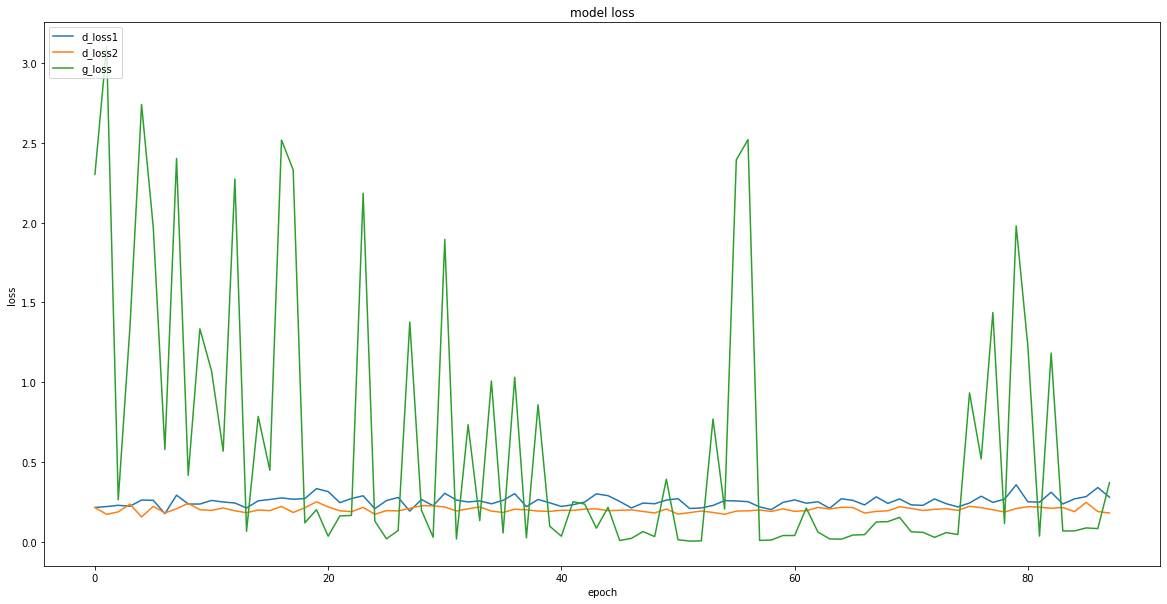

In [590]:


    
save_img_losses(wgangp.d_loss1_list, wgangp.d_loss2_list, wgangp.g_loss_list, True)

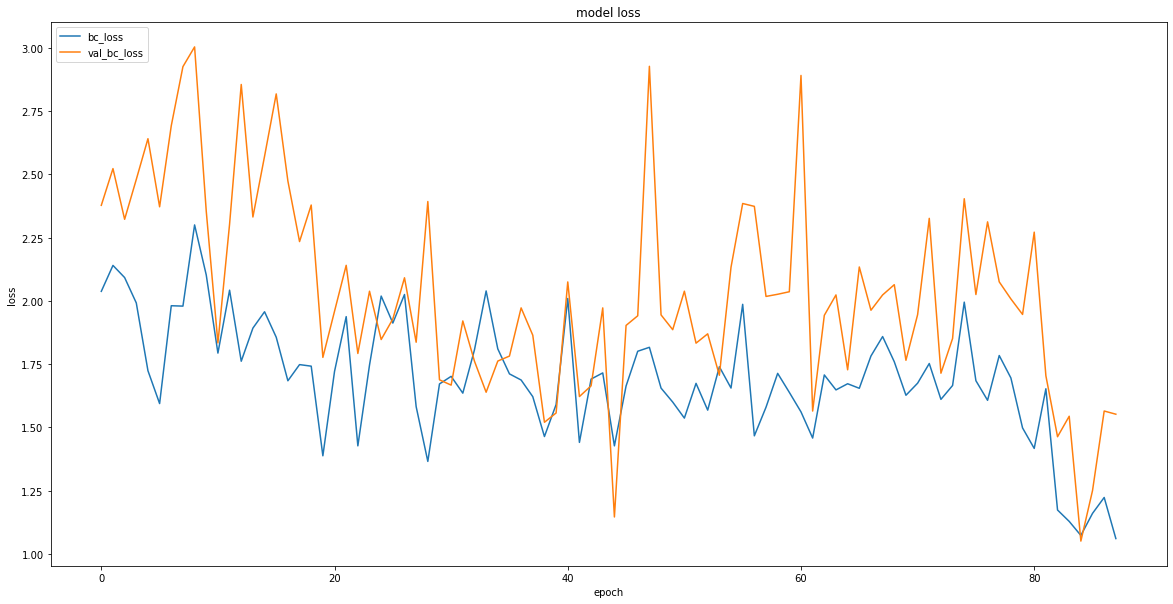

In [594]:

from matplotlib import pyplot as plt

    
save_classifier_loss(wgangp.bc_loss_list, wgangp.val_loss_list, True)

In [2]:

from matplotlib import pyplot as plt


In [ ]:
smooth_positive_labels(np.array([1,1,1,1]))

In [ ]:
wgangp.best_val_auc

In [ ]:
wgangp.evaluate_buyer_classifier(dataset)

In [56]:

import lib.input.single_stg.scale as scale
from lib.models.single_stage import training
from lib.utils import process_input
from imp import reload
    # Do some things.
single = reload(single)
process_input = reload(process_input)

In [ ]:

create_readable_df_stg(X_train[2], get_gen_outs(),encoders)

## Generate fakes for training

In [123]:
X_train, y_train_c, y_train_items, train_input = dataset['all_train_under']
d = Counter(y_train_c)
non_buyers = d[0]
buyers= d[1]

In [124]:
print(buyers)
n_samples = buyers

x_input = randn(wgangp.noise_dim * n_samples)

z_input = x_input.reshape(n_samples, wgangp.noise_dim)
# generate labels
labels = ones((n_samples,1))
len_labels = randint(1, 14, n_samples)


X_fake = wgangp.generator([z_input, len_labels, labels])
X_fake.shape

123278


TensorShape([123278, 13, 317])

In [129]:
import gc
gc.collect()

216951

TypeError: only integer scalar arrays can be converted to a scalar index

In [1]:
N

NameError: name 'N' is not defined

## Transfer

In [58]:
N, F = (N,F)
model_checkpoint_base_name = './cache/' + 'gan' + '_{}_model_weights_step_{}.h5'
b = model_checkpoint_base_name.format('buyerclassifie', 3)
c = model_checkpoint_base_name.format('generator', 3)
print(b)

wgangp.buyer_classifier.load_weights('cache/gan_buyerclassifier_model_weights_step_3.h5')
wgangp.generator.load_weights('cache/gan_generator_model_weights_step_3.h5')
wgangp.print_fakes_for_k()

./cache/gan_buyerclassifie_model_weights_step_3.h5
    item_id  category           day          hour         month       weekday  \
0       0.0       0.0  1.676946e-07  2.984698e-09  3.206903e-11  1.102082e-08   
1       0.0       0.0  1.755311e-07  4.245915e-09  1.805344e-11  9.317016e-08   
2       0.0       0.0  1.879603e-07  1.033621e-08  1.806136e-11  3.227217e-07   
3       0.0       0.0  2.140025e-07  1.935233e-08  3.311176e-11  4.721907e-07   
4       0.0       0.0  2.472888e-07  2.267259e-08  4.466515e-11  6.306016e-07   
5       0.0       0.0  1.814270e-07  1.866911e-08  4.359654e-11  4.604981e-07   
6       0.0       0.0  7.920849e-08  5.007025e-09  2.367375e-11  1.574795e-07   
7       0.0       0.0  3.764149e-08  2.921915e-09  1.223808e-11  8.931286e-08   
8       0.0       0.0  2.491341e-08  1.387129e-09  6.884094e-12  4.373674e-08   
9       0.0       0.0  3.369158e-08  1.861343e-09  4.573052e-12  6.193475e-08   
10      0.0       0.0  1.557689e-08  6.054455e-10  2.66680

In [60]:
N,F

(13, 282)

In [84]:
from tensorflow.keras.models import Sequential

buyer_classifier = wgangp.buyer_classifier
base_model = buyer_classifier.layers[:-4]


X_in = Input(shape=(N,F))        
label_in = Input(shape=(1,))
input_shape=(None,N,F)


    
x = base_model[-1].output    

x  = GRU(32, return_sequences=True)(x)
x  = GRU(32, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(1,'sigmoid')(x)

model =  Model(inputs=buyer_classifier.input, outputs=x)
model.compile(optimizer = Adam(),loss = 'binary_crossentropy', metrics = ['accuracy', AUC(name='auc', multi_label=False)])
# model.summary()

Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_1


[functional.py:698 - _validate_graph_inputs_and_outputs()]:WARNING Functional model inputs must come from `tf.keras.Input` (thus holding past layer metadata), they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to "model_8" was not an Input tensor, it was generated by layer input_1.
Note that input tensors are instantiated via `tensor = tf.keras.Input(shape)`.
The tensor that caused the issue was: input_1


In [85]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None,)              0           input_3[0][0]                    
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 13)           182         lambda_1[0][0]                   
__________________________________________________________________________________________________
input_1 (InputLayer)            multiple             0                                            
____________________________________________________________________________________________

## Train classifier


In [375]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12043519556333142548
]
Please install GPU version of TF


In [ ]:
X_train, y_train, _,train_inp_len = dataset['all_train_under']
X_valid, y_valid, _, valid_inp_len = dataset['all_valid']
        
batch_size = 1024

validD = DataGenerator(X_valid, (y_valid), 13, valid_inp_len, batch_size)
def evalu():
    print(wgangp.buyer_classifier.evaluate(validD))

class Eval(keras.callbacks.Callback):
    def __init__(self, validD, validation=None):
        super(Eval, self).__init__()
        self.validD = validD
        self.valid_loss, self.valid_acc, self.valid_auc = [],[],[]
    
#     def on_train_begin(self, logs={}):
        
    def on_epoch_end(self, batch, logs={}):
        loss, acc, auc = wgangp.buyer_classifier.evaluate(self.validD)
        self.valid_loss.append(loss)
        self.valid_acc.append(acc)
        self.valid_auc.append(auc)

print(y_train, y_valid)

bc_loss, bc_acc, bc_auc = model.fit(
    DataGenerator(X_train[:], (y_train), 13, train_inp_len[:],  256),
    validation_data=validD,
    #callbacks = [Eval(validD)],
    epochs=20)
        

In [144]:
model = wgangp.buyer_classifier

In [ ]:
wgangp.buyer_classifier.summary()

## With Fakes

In [381]:

X_in = Input(shape=(N,F))        
label_in = Input(shape=(1,))
len_in = Input(shape=(1,))

len_inp_l = Lambda(lambda x: x[:,0])(len_in)
len_inp_l = Embedding(N+1, N)(len_inp_l)
len_inp_l = RepeatVector(N)(len_inp_l)        

x = Concatenate()([X_in, len_inp_l])

depth=3
for k in range(depth,0,-1):
    x = Bidirectional(GRU(32 * k, return_sequences = True))(x)            
    #             x = BatchNormalization(name='gru_bn_'+str(k))(x)
    x = LeakyReLU(0.2, name='gru_leakyrelu_' + str(k))(x)
    x = Dropout(0.3)(x)


x = Flatten()(x)
x = Dropout(0.3)(x)

fe = Dense(1)(x)
# supervised output
x = Activation('sigmoid')(fe)
#         x = Activation('softmax')(fe)


loss_f = 'binary_crossentropy'
#         loss_f = 'categorical_crossentropy'

sequence_encoder = fe
opt = Adam(5e-4,0.9,0.99)
model =  Model(inputs=[X_in, len_in], outputs=x)
model.compile(optimizer = opt,loss = loss_f, metrics = ['accuracy', AUC(name='auc', multi_label=False)])

In [ ]:
wgangp.gene